# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

found_lats = []
found_lngs = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        found_lats.append(lat_lng[0])
        found_lngs.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(len(cities))

cities_list = pd.DataFrame({"City":cities, "Latitude": found_lats, "Longitude": found_lngs})
cities_list

601


,City,Latitude,Longitude
0,nizhneyansk,78.693466,139.336904
1,torbay,34.979305,-44.261930
2,chokurdakh,88.827176,147.310758
3,busselton,-40.582615,99.814158
4,isangel,-20.669477,179.597273
...,...,...,...
596,toamasina,-18.353794,49.819889
597,dhidhdhoo,7.371072,71.977562
598,ascope,-7.453305,-79.098429
599,quatre cocos,-17.206488,67.124508


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
query_url = f"{url}appid={weather_api_key}&units={units}&q="
weather_response = requests.get(query_url+"los angeles").json()
weather_response

{'coord': {'lon': -118.2437, 'lat': 34.0522},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 70.09,
  'feels_like': 69.57,
  'temp_min': 62.6,
  'temp_max': 75.99,
  'pressure': 1013,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 3.44, 'deg': 250},
 'clouds': {'all': 1},
 'dt': 1618704813,
 'sys': {'type': 1,
  'id': 3694,
  'country': 'US',
  'sunrise': 1618665532,
  'sunset': 1618712735},
 'timezone': -25200,
 'id': 5368361,
 'name': 'Los Angeles',
 'cod': 200}

In [4]:
i=0
data=[]

for city in cities:

    json = requests.get(query_url + city).json()
    i=i+1
    
    try:
        tempmax=json["main"]['temp_max']
        humidity=json["main"]["humidity"]
        speed=json['wind']["speed"]
        cloudiness=json["clouds"]["all"]
        lat=json["coord"]["lat"]
        country=json['sys']["country"]
        date=json['dt']
        lon=json["coord"]["lon"]
        data.append([date,city,country,lat,lon,tempmax,humidity,cloudiness,speed])
        print(f"city {i} || {city}")
        time.sleep(.1)
    except:
        print("no city")

no city
city 2 || torbay
city 3 || chokurdakh
city 4 || busselton
city 5 || isangel
city 6 || high level
no city
city 8 || college
city 9 || juneau
city 10 || bambous virieux
city 11 || katsuura
city 12 || butaritari
city 13 || talnakh
no city
city 15 || avarua
city 16 || kodiak
city 17 || albany
city 18 || axim
city 19 || bacolod
city 20 || egvekinot
city 21 || tiksi
city 22 || cape town
city 23 || palmer
city 24 || boralday
no city
city 26 || kindberg
city 27 || south lake tahoe
city 28 || san pedro de cajas
city 29 || rikitea
city 30 || punta arenas
city 31 || airai
city 32 || safut
city 33 || mataura
no city
city 35 || thompson
city 36 || ancud
city 37 || hobart
city 38 || korla
city 39 || port elizabeth
city 40 || zhezkazgan
city 41 || bredasdorp
city 42 || lorengau
city 43 || arraial do cabo
city 44 || narasannapeta
city 45 || longido
city 46 || fort frances
city 47 || ushuaia
city 48 || hermanus
city 49 || port alfred
city 50 || fairbanks
city 51 || bontang
city 52 || yellowknif

city 409 || robertsport
city 410 || adrar
city 411 || vestmannaeyjar
city 412 || brasileia
city 413 || erzin
city 414 || auch
city 415 || tocopilla
city 416 || porbandar
city 417 || ayan
city 418 || otradnoye
city 419 || yulara
city 420 || pauini
city 421 || ola
city 422 || odweyne
city 423 || petropavlovsk-kamchatskiy
city 424 || monrovia
city 425 || monkey bay
city 426 || raga
city 427 || rawson
city 428 || iskateley
no city
city 430 || whitianga
city 431 || chumikan
city 432 || kant
city 433 || nouna
city 434 || prudy
city 435 || great bend
city 436 || antalaha
city 437 || tilichiki
city 438 || ponta delgada
city 439 || sesimbra
city 440 || seoul
city 441 || nea peramos
city 442 || hervey bay
city 443 || portland
city 444 || alofi
city 445 || muli
city 446 || catumbela
no city
city 448 || hasaki
city 449 || antsohihy
no city
no city
city 452 || mhlume
city 453 || namibe
no city
city 455 || badarwas
city 456 || aksu
city 457 || bentiu
city 458 || umm kaddadah
city 459 || tahta
city 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
raw_data=pd.DataFrame(data,columns=["Date","City","Country",
                                   "Latitude","Longitude",
                                   "Max Temperature (F)","Humidity (%)",
                                   "Cloudiness (%)","Wind Speed (mph)"])

raw_data.head()

,Date,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,1618704343,torbay,CA,47.6666,-52.7314,35.01,100,90,13.80
1,1618704310,chokurdakh,RU,70.6333,147.9167,17.11,86,100,5.21
2,1618704054,busselton,AU,-33.6500,115.3333,62.28,69,0,7.07
3,1618704658,isangel,VU,-19.5500,169.2667,82.40,78,75,8.05
4,1618704328,high level,CA,58.5169,-117.1360,44.60,49,75,10.36


In [6]:
raw_data.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
dirty_data = raw_data[(raw_data["Humidity (%)"]>100)].index
dirty_data

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = raw_data.drop(dirty_data, inplace=False)
clean_city_data

,Date,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,1618704343,torbay,CA,47.6666,-52.7314,35.01,100,90,13.80
1,1618704310,chokurdakh,RU,70.6333,147.9167,17.11,86,100,5.21
2,1618704054,busselton,AU,-33.6500,115.3333,62.28,69,0,7.07
3,1618704658,isangel,VU,-19.5500,169.2667,82.40,78,75,8.05
4,1618704328,high level,CA,58.5169,-117.1360,44.60,49,75,10.36
...,...,...,...,...,...,...,...,...,...
558,1618705027,toamasina,MG,-18.1667,49.3833,69.80,94,75,16.11
559,1618705028,dhidhdhoo,MV,6.8833,73.1000,83.61,71,34,5.75
560,1618705028,ascope,PE,-7.7144,-79.1078,66.20,88,75,9.22
561,1618705029,quatre cocos,MU,-20.2078,57.7625,77.00,94,75,5.75


In [13]:
#Pull important data for plotting
lat = clean_city_data["Latitude"]
tempmax = clean_city_data["Max Temperature (F)"]
humidity = clean_city_data["Humidity (%)"]
cloudiness = clean_city_data["Cloudiness (%)"]
wind_speed = clean_city_data["Wind Speed (mph)"]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

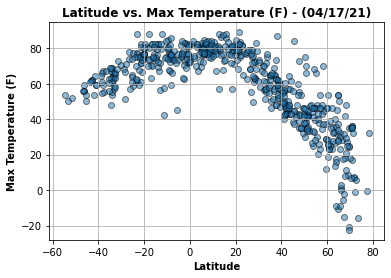

In [20]:
plt.scatter(lat, 
            tempmax,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5)

plt.title("Latitude vs. Max Temperature (F) - (%s)" % time.strftime("%x"), fontweight='bold')
plt.ylabel("Max Temperature (F)", fontweight='bold')
plt.xlabel("Latitude", fontweight='bold')
plt.grid(True)
#Save as image
plt.savefig('output_data/Latitude vs. Temperature Plot.png')

## Latitude vs. Humidity Plot

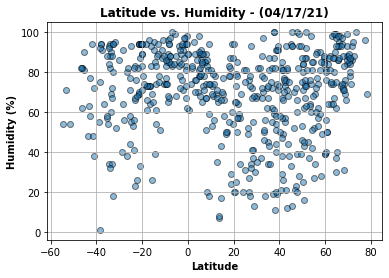

In [21]:
plt.scatter(lat, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5)

plt.title("Latitude vs. Humidity - (%s)" % time.strftime("%x"), fontweight='bold')
plt.ylabel("Humidity (%)", fontweight='bold')
plt.xlabel("Latitude", fontweight='bold')
plt.grid(True)
#Save as image
plt.savefig('output_data/Latitude vs. Humidity Plot.png')

## Latitude vs. Cloudiness Plot

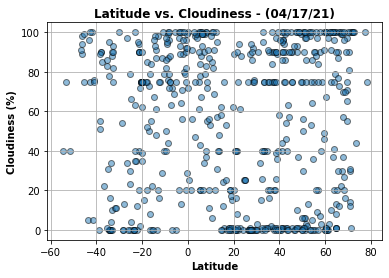

In [23]:
plt.scatter(lat, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5)

plt.title("Latitude vs. Cloudiness - (%s)" % time.strftime("%x"), fontweight='bold')
plt.ylabel("Cloudiness (%)", fontweight='bold')
plt.xlabel("Latitude", fontweight='bold')
plt.grid(True)
#Save as image
plt.savefig('output_data/Latitude vs. Cloudiness Plot.png')

## Latitude vs. Wind Speed Plot

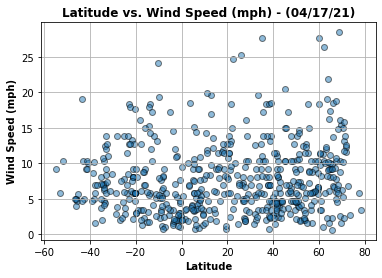

In [22]:
plt.scatter(lat, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5)

plt.title("Latitude vs. Wind Speed (mph) - (%s)" % time.strftime("%x"), fontweight='bold')
plt.ylabel("Wind Speed (mph)", fontweight='bold')
plt.xlabel("Latitude", fontweight='bold')
plt.grid(True)
#Save as image
plt.savefig('output_data/Latitude vs. Wind Speed Plot.png')

## Linear Regression

In [48]:
northern_hemisphere=clean_city_data.loc[(clean_city_data["Latitude"]>=0)]
southern_hemisphere=clean_city_data.loc[(clean_city_data["Latitude"]<0)]

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Format the plots
    plt.scatter(x_values,y_values)
    plt.grid(True)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=20,color="black")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7474516137888786


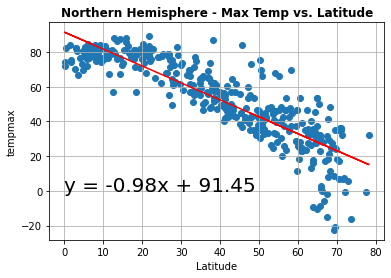

In [49]:
plt.title("Northern Hemisphere - Max Temp vs. Latitude", fontweight='bold')

x_values=northern_hemisphere["Latitude"]
y_values=northern_hemisphere["Max Temperature (F)"]

plot_linear_regression(x_values,y_values,"tempmax",(0,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.3903832740967389


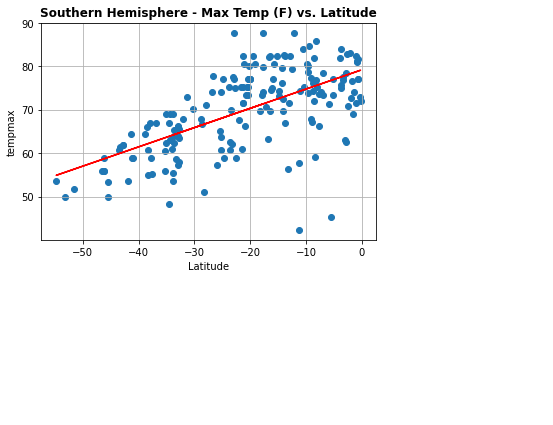

In [50]:
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude", fontweight='bold')

x_values=southern_hemisphere["Latitude"]
y_values=southern_hemisphere["Max Temperature (F)"]

plot_linear_regression(x_values,y_values,"tempmax",(0,0))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.015984665965012457


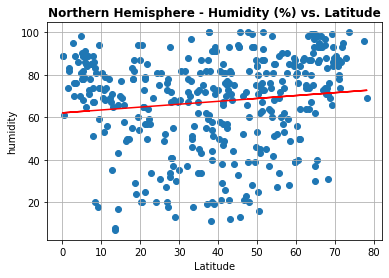

In [51]:
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude", fontweight='bold')

x_values=northern_hemisphere["Latitude"]
y_values=northern_hemisphere["Humidity (%)"]

plot_linear_regression(x_values,y_values,"humidity",(0,0))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.0973288329763264


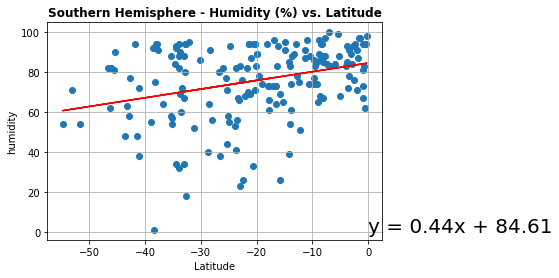

In [52]:
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude", fontweight='bold')

x_values=southern_hemisphere["Latitude"]
y_values=southern_hemisphere["Humidity (%)"]

plot_linear_regression(x_values,y_values,"humidity",(0,0))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.0012446709673517523


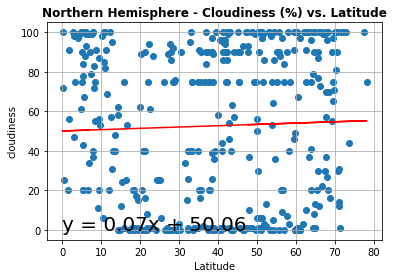

In [53]:
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude", fontweight='bold')

x_values=northern_hemisphere["Latitude"]
y_values=northern_hemisphere["Cloudiness (%)"]

plot_linear_regression(x_values,y_values,"cloudiness",(0,0))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.03598823399033019


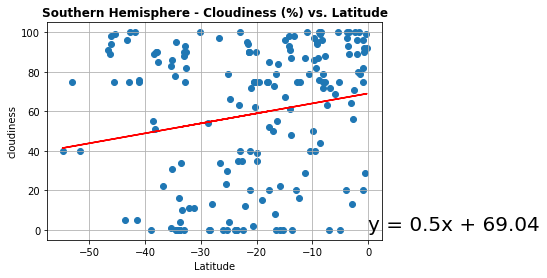

In [54]:
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude", fontweight='bold')

x_values=southern_hemisphere["Latitude"]
y_values=southern_hemisphere["Cloudiness (%)"]

plot_linear_regression(x_values,y_values,"cloudiness",(0,0))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.019298576717590454


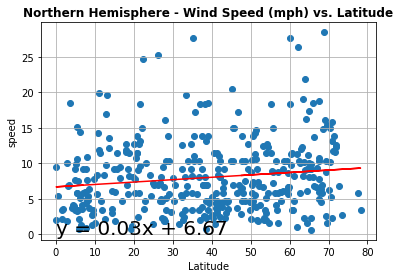

In [55]:
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude", fontweight='bold')

x_values=northern_hemisphere["Latitude"]
y_values=northern_hemisphere["Wind Speed (mph)"]

plot_linear_regression(x_values,y_values,"speed",(0,0))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.017917697728295125


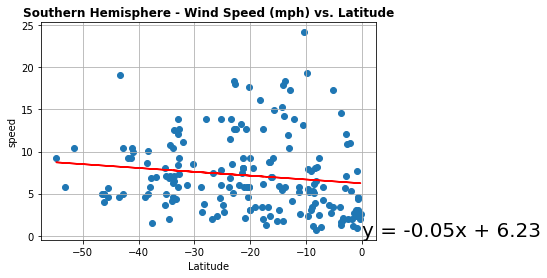

In [56]:
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude", fontweight='bold')

x_values=southern_hemisphere["Latitude"]
y_values=southern_hemisphere["Wind Speed (mph)"]

plot_linear_regression(x_values,y_values,"speed",(0,0))